#**API Data Analysis Project: Global Warming & Weather Trends**

##**Part 1: Hong Kong Analysis**

In [ ]:
# Installing the Required Libraries
!pip install meteostat pandas

In [ ]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

location = Point(22.3193, 114.1694)

start = datetime(1990, 1, 1)
end = datetime(2025, 7, 31)

data = Daily(location, start, end).fetch()

df = pd.DataFrame(data)

df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1990-01-01,16.4,14.6,17.4,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>
1990-01-02,15.6,14.7,17.4,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>
1990-01-03,15.8,14.7,17.2,0.0,<NA>,<NA>,17.4,<NA>,<NA>,<NA>
1990-01-04,16.0,15.3,16.8,0.0,<NA>,<NA>,22.3,<NA>,<NA>,<NA>
1990-01-05,17.1,15.6,18.2,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2025-07-27,29.1,27.4,31.9,0.9,<NA>,<NA>,24.0,<NA>,1000.1,<NA>
2025-07-28,28.6,26.2,31.4,4.5,<NA>,<NA>,22.5,<NA>,998.1,<NA>
2025-07-29,27.3,24.9,31.3,48.7,<NA>,<NA>,22.1,<NA>,997.1,<NA>


In [ ]:
df.to_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12996 entries, 1990-01-01 to 2025-07-31
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12954 non-null  Float64
 1   tmin    11842 non-null  Float64
 2   tmax    12281 non-null  Float64
 3   prcp    4014 non-null   Float64
 4   snow    0 non-null      Float64
 5   wdir    0 non-null      Float64
 6   wspd    12856 non-null  Float64
 7   wpgt    0 non-null      Float64
 8   pres    2595 non-null   Float64
 9   tsun    0 non-null      Float64
dtypes: Float64(10)
memory usage: 1.2 MB


In [ ]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,12954.0,11842.0,12281.0,4014.0,0.0,0.0,12856.0,0.0,2595.0,0.0
mean,24.015015,21.890002,26.737766,5.990209,<NA>,<NA>,15.73974,<NA>,1012.378574,<NA>
std,5.32288,5.390113,5.442633,19.4186,<NA>,<NA>,5.550502,<NA>,6.534797,<NA>
min,4.8,-3.1,6.4,0.0,<NA>,<NA>,3.5,<NA>,988.0,<NA>
25%,19.9,17.9,22.9,0.0,<NA>,<NA>,11.7,<NA>,1007.3,<NA>
50%,25.2,23.0,28.0,0.0,<NA>,<NA>,14.8,<NA>,1011.9,<NA>
75%,28.6,26.4,31.1,2.675,<NA>,<NA>,18.7,<NA>,1017.5,<NA>
max,33.4,31.6,37.0,418.1,<NA>,<NA>,63.4,<NA>,1030.6,<NA>


**Temperature Trends**

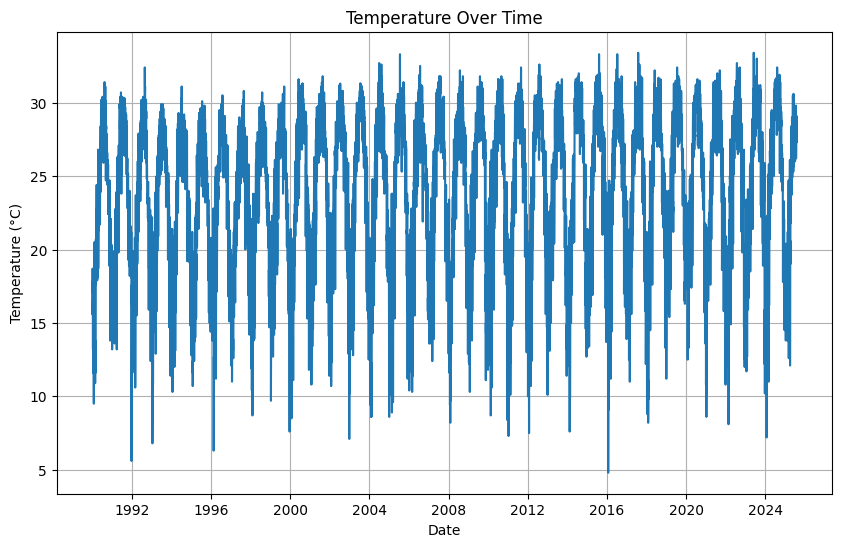

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='tavg')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

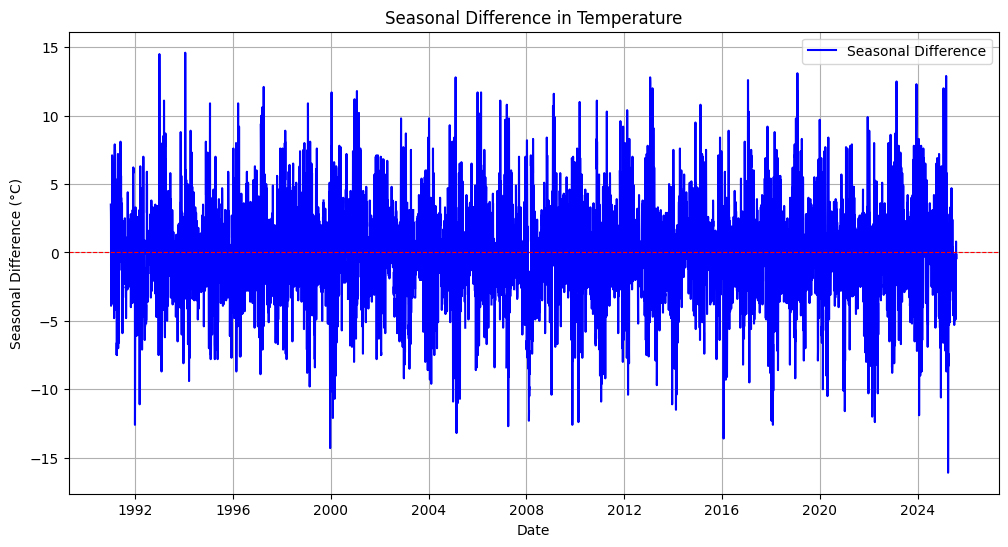

In [ ]:
# Calculate seasonal difference (e.g., year-over-year)
df['seasonal_diff'] = df['tavg'].diff(periods=365)  # Assuming daily data

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['seasonal_diff'], label='Seasonal Difference', color='blue')
plt.title('Seasonal Difference in Temperature')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference (°C)')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Adding a horizontal line at zero
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Extract winter months: December (12), January (1), February (2)
winter_months = df[df.index.month.isin([12, 1, 2])]

# Calculate average winter temperature per year
winter_avg = winter_months.resample('Y').mean()

# Compare average winter temperatures
winter_avg['Temperature Change'] = winter_avg['tavg'].diff()

# Determine if winters are colder, warmer, or shorter
if winter_avg['Temperature Change'].iloc[-1] > 0:
    result = "Warmer"
elif winter_avg['Temperature Change'].iloc[-1] < 0:
    result = "Colder"
else:
    result = "No significant change"

# Print results
print("Average Winter Temperatures (°C):")
print(winter_avg['tavg'])
print(f"\nLatest winter compared to the previous: {result}")

Average Winter Temperatures (°C):
time
1990-12-31    16.987778
1991-12-31    17.487778
1992-12-31    16.806593
1993-12-31    16.346667
1994-12-31    17.672222
1995-12-31    15.942222
1996-12-31    16.679121
1997-12-31    16.825843
1998-12-31    17.194444
1999-12-31    17.030337
2000-12-31    16.817582
2001-12-31    17.757778
2002-12-31    17.993333
2003-12-31    17.608989
2004-12-31    17.567778
2005-12-31     16.55618
2006-12-31    18.006742
2007-12-31    18.865169
2008-12-31    16.031111
2009-12-31    18.146667
2010-12-31    18.103333
2011-12-31    15.614444
2012-12-31    16.501099
2013-12-31    17.521111
2014-12-31    16.535556
2015-12-31    18.223333
2016-12-31    17.472527
2017-12-31    18.487778
2018-12-31    17.414444
2019-12-31    19.473333
2020-12-31    18.640659
2021-12-31    18.266667
2022-12-31    16.483333
2023-12-31    18.566667
2024-12-31     18.59011
2025-12-31    17.525424
Freq: YE-DEC, Name: tavg, dtype: Float64

Latest winter compared to the previous: Colder


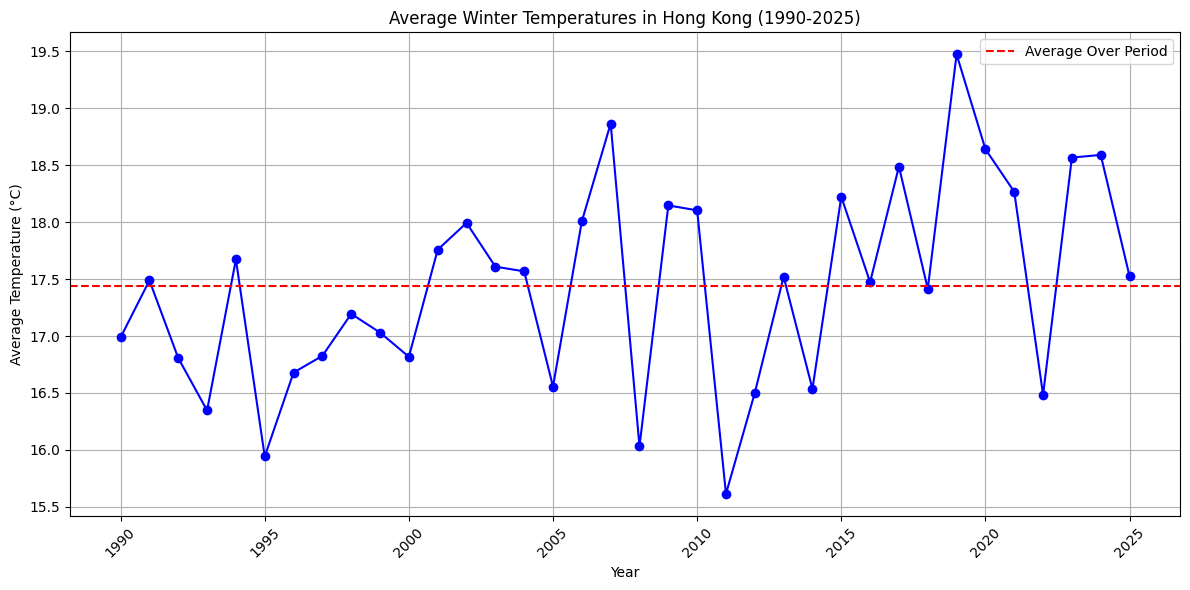

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(winter_avg.index.year, winter_avg['tavg'], marker='o', linestyle='-', color='blue')
plt.title('Average Winter Temperatures in Hong Kong (1990-2025)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.axhline(y=winter_avg['tavg'].mean(), color='red', linestyle='--', label='Average Over Period')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

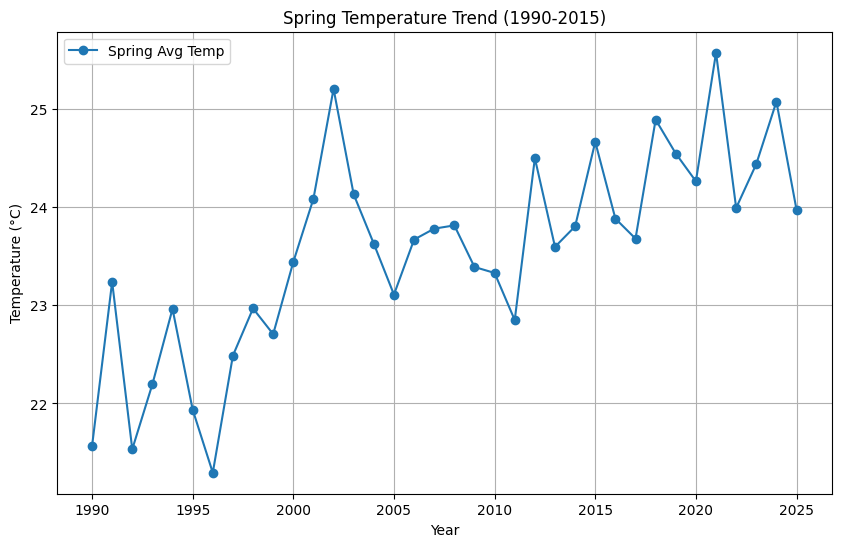

Spring is getting warmer on average by 0.07°C per year.


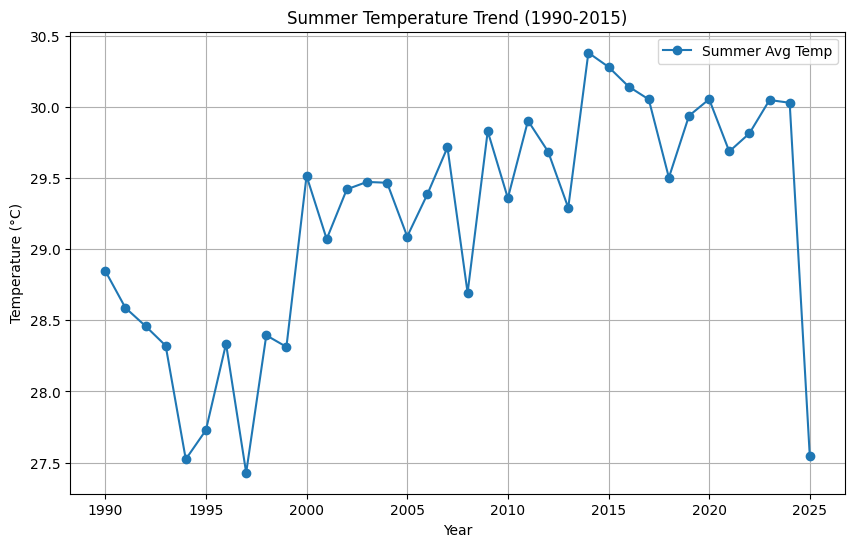

Summer is getting colder on average by 0.04°C per year.


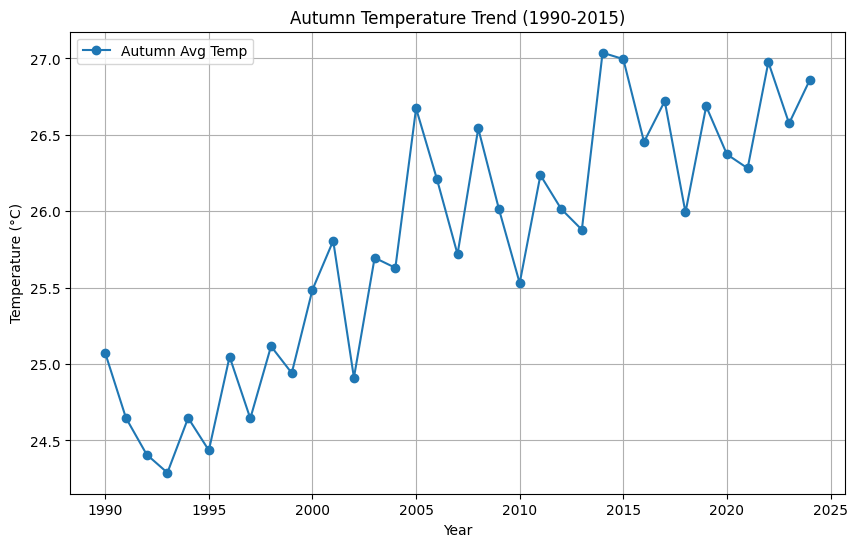

Autumn is getting warmer on average by 0.05°C per year.


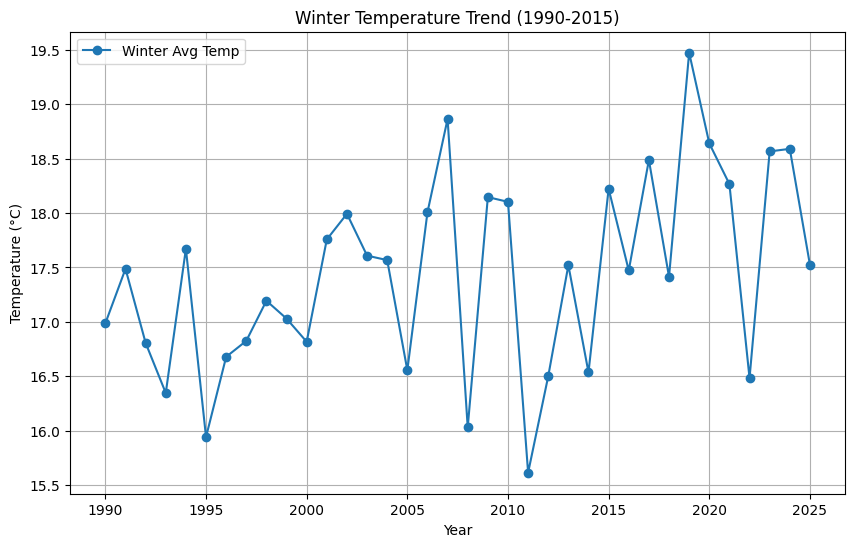

Winter is getting warmer on average by 0.02°C per year.


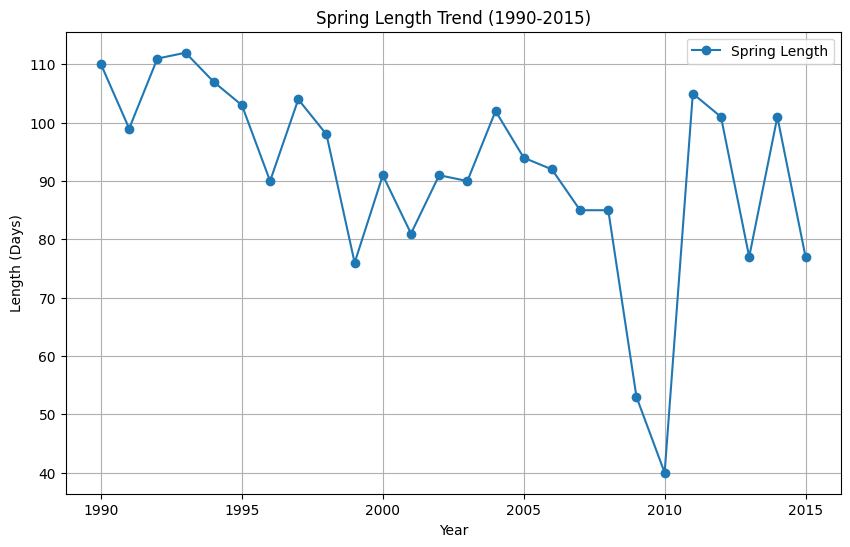

Spring is getting shorter on average by 1.32 days per year.


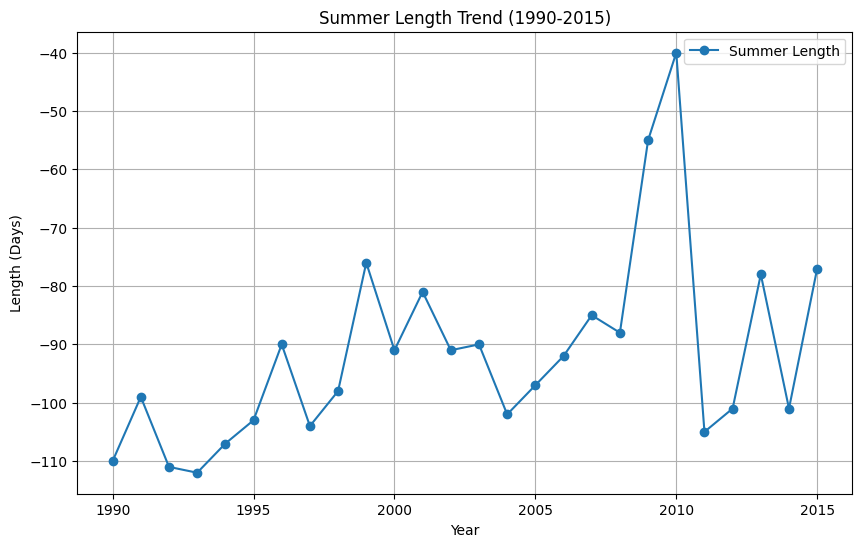

Summer is getting longer on average by 1.32 days per year.


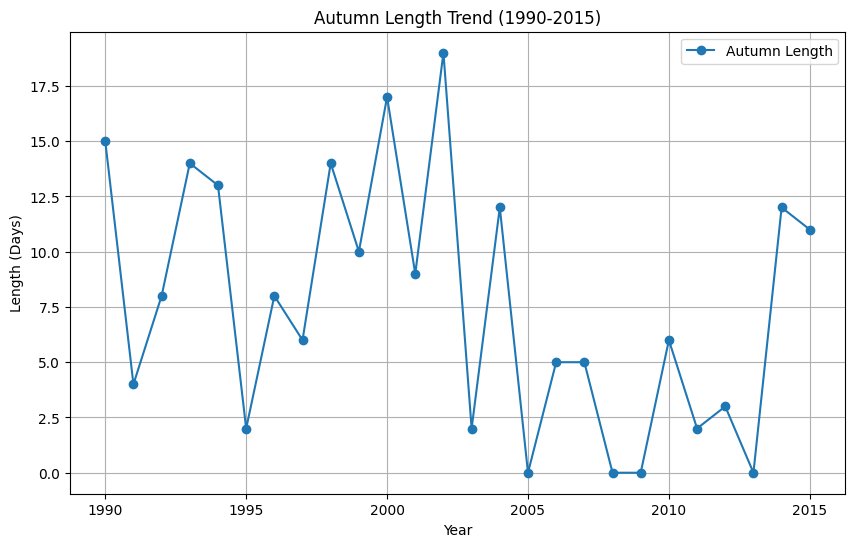

Autumn is getting shorter on average by 0.16 days per year.


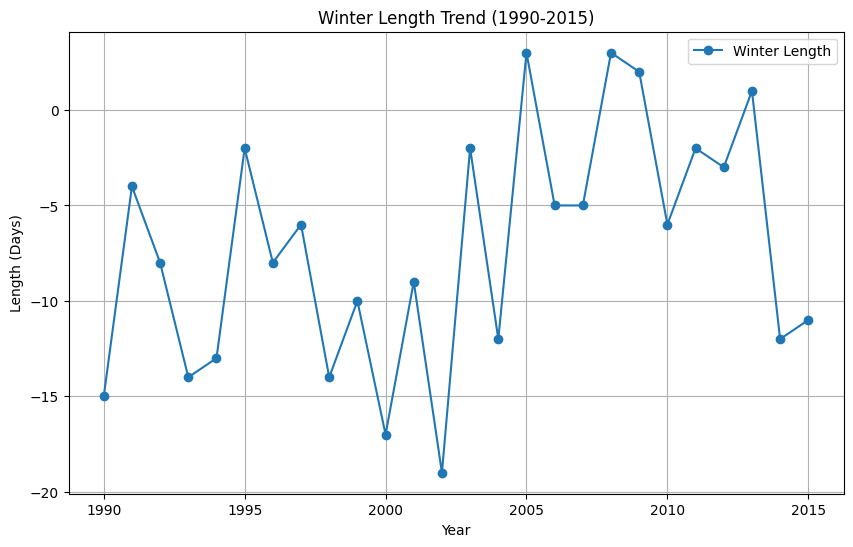

Winter is getting longer on average by 0.16 days per year.


In [ ]:
# Add necessary columns for analysis
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Define seasons based on meteorological definitions
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Add a 'Season' column
data['Season'] = data['Month'].apply(get_season)

# Group data by Year and Season, and calculate average temperature
seasonal_avg_temp = data.groupby(['Year', 'Season'])['tavg'].mean().reset_index()

# Analyze seasonal trends
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
for season in seasons:
    # Filter data for the current season
    season_data = seasonal_avg_temp[seasonal_avg_temp['Season'] == season]

    # Plot the temperature trend for the season
    plt.figure(figsize=(10, 6))
    plt.plot(season_data['Year'], season_data['tavg'], marker='o', label=f'{season} Avg Temp')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'{season} Temperature Trend (1990-2015)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calculate the trend (colder/warmer) using linear regression
    trend = season_data['tavg'].diff().mean()
    if trend > 0:
        print(f"{season} is getting warmer on average by {trend:.2f}°C per year.")
    elif trend < 0:
        print(f"{season} is getting colder on average by {abs(trend):.2f}°C per year.")
    else:
        print(f"{season} shows no significant temperature change.")

# Analyze season length trends
# Define thresholds for season start/end based on temperature
thresholds = {
    'Spring': 15,  # Start when temperature rises above 15°C
    'Summer': 25,  # Start when temperature rises above 25°C
    'Autumn': 25,  # End when temperature drops below 25°C
    'Winter': 15   # End when temperature drops below 15°C
}

# Function to calculate season lengths
def calculate_season_length(data, season, threshold):
    season_lengths = []
    for year in range(1990, 2016):
        yearly_data = data[data['Year'] == year]
        if season == 'Spring':
            start = yearly_data[yearly_data['tavg'] > threshold].index.min()
            end = yearly_data[yearly_data['tavg'] > thresholds['Summer']].index.min()
        elif season == 'Summer':
            start = yearly_data[yearly_data['tavg'] > threshold].index.min()
            end = yearly_data[yearly_data['tavg'] < thresholds['Autumn']].index.min()
        elif season == 'Autumn':
            start = yearly_data[yearly_data['tavg'] < thresholds['Autumn']].index.min()
            end = yearly_data[yearly_data['tavg'] < thresholds['Winter']].index.min()
        elif season == 'Winter':
            start = yearly_data[yearly_data['tavg'] < threshold].index.min()
            end = yearly_data[yearly_data['tavg'] > thresholds['Spring']].index.min()
        if pd.notna(start) and pd.notna(end):
            season_lengths.append((end - start).days)
    return season_lengths

# Calculate and display the season length trends
for season in seasons:
    length_trend = calculate_season_length(data, season, thresholds[season])
    plt.figure(figsize=(10, 6))
    plt.plot(range(1990, 1990 + len(length_trend)), length_trend, marker='o', label=f'{season} Length')
    plt.xlabel('Year')
    plt.ylabel('Length (Days)')
    plt.title(f'{season} Length Trend (1990-2015)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calculate the trend (shorter/longer) using the average change
    length_diff = pd.Series(length_trend).diff().mean()
    if length_diff > 0:
        print(f"{season} is getting longer on average by {length_diff:.2f} days per year.")
    elif length_diff < 0:
        print(f"{season} is getting shorter on average by {abs(length_diff):.2f} days per year.")
    else:
        print(f"{season} shows no significant change in length.")